# First Name: Finley
# Last Name: Sherwood

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Import Data

In [2]:
bottle = pd.read_csv('bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x: '%f'%x)

# Data management 

In [3]:
bottle['Depthm'] = pd.to_numeric(bottle['Depthm'])
bottle['T_degC'] = pd.to_numeric(bottle['T_degC'])

In [4]:
sub1 = bottle.copy()
sub1 = sub1[(sub1['Depthm'] >= 0) & (sub1['Depthm'] <= 2000)]
sub1 = sub1[(sub1['T_degC'] >= 0) & (sub1['T_degC'] <= 20)]

In [5]:
sub2 = sub1.copy()
sub2['Depthm'] = pd.cut(sub2.Depthm, [0, 500, 1000, 1500, 2000])
sub2['T_degC'] = pd.cut(sub2.T_degC, [0, 5, 10, 15, 20])

In [6]:
sub2.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,NaN,"(10, 15]",33.440000,nan,25.649000,...,nan,0,nan,nan,nan,nan,nan,nan,nan,NaN
1,1,2,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0008A-3,"(0.0, 500.0]","(10, 15]",33.440000,nan,25.656000,...,nan,8,nan,nan,nan,nan,nan,nan,nan,NaN
2,1,3,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0010A-7,"(0.0, 500.0]","(10, 15]",33.437000,nan,25.654000,...,nan,10,nan,nan,nan,nan,nan,nan,nan,NaN
3,1,4,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0019A-3,"(0.0, 500.0]","(10, 15]",33.420000,nan,25.643000,...,nan,19,nan,nan,nan,nan,nan,nan,nan,NaN
4,1,5,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0020A-7,"(0.0, 500.0]","(10, 15]",33.421000,nan,25.643000,...,nan,20,nan,nan,nan,nan,nan,nan,nan,NaN


# Chart/Plot

In [7]:
ct = pd.crosstab(sub2['Depthm'], sub2['T_degC'])
print(ct) 

T_degC        (0, 5]  (5, 10]  (10, 15]  (15, 20]
Depthm                                           
(0, 500]         557   331693    262534    123162
(500, 1000]    32420    38863       191         0
(1000, 1500]   12915        8        56         0
(1500, 2000]    2224        1         5         0


In [8]:
colsum = ct.sum(axis=0)
colpct = ct/colsum
print(colpct)

T_degC         (0, 5]  (5, 10]  (10, 15]  (15, 20]
Depthm                                            
(0, 500]     0.011576 0.895101  0.999041  1.000000
(500, 1000]  0.673788 0.104875  0.000727  0.000000
(1000, 1500] 0.268414 0.000022  0.000213  0.000000
(1500, 2000] 0.046222 0.000003  0.000019  0.000000


Text(10.049999999999997, 0.5, 'Temperature')

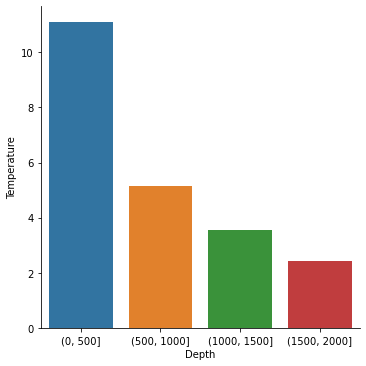

In [9]:
%matplotlib inline

sub1['Depthm'] = pd.cut(sub1.Depthm, [0, 500, 1000, 1500, 2000])

sns.catplot(x='Depthm', y='T_degC', data=sub1, kind='bar', ci=None)
plt.xlabel('Depth')
plt.ylabel('Temperature')

# CHI_Squared

In [10]:
print('chi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct)
print(cs1)

chi-square value, p value, expected counts
(503905.51301061624, 0.0, 9, array([[4.29324443e+04, 3.30643886e+05, 2.34475960e+05, 1.09893709e+05],
       [4.27407288e+03, 3.29167390e+04, 2.33428904e+04, 1.09402977e+04],
       [7.76131067e+02, 5.97736738e+03, 4.23884734e+03, 1.98665422e+03],
       [1.33351743e+02, 1.02700742e+03, 7.28301838e+02, 3.41339002e+02]]))


In [12]:
sub3 = bottle.copy()
cat = [0, 500, 1000, 1500, 2000]

for x in range(0,len(cat)-1):
    for y in range(x+1,len(cat)):
        sub3['temp'] = sub3['Depthm'].map({cat[x]:cat[x], cat[y]:cat[y]})
        cont = pd.crosstab(sub3['T_degC'], sub3['temp'])
        cs = scipy.stats.chi2_contingency(cont)
        print('\n', cat[x], ' versus ', cat[y],
              'Chi value: ', cs[0], '\t\tp value: ', cs[1])


 0  versus  500 Chi value:  56821.46002921086 		p value:  0.0

 0  versus  1000 Chi value:  38347.95600559978 		p value:  0.0

 0  versus  1500 Chi value:  32661.821108551307 		p value:  0.0

 0  versus  2000 Chi value:  32753.999999999996 		p value:  0.0

 500  versus  1000 Chi value:  30110.61136684385 		p value:  0.0

 500  versus  1500 Chi value:  24982.329406942885 		p value:  0.0

 500  versus  2000 Chi value:  25041.914858685323 		p value:  0.0

 1000  versus  1500 Chi value:  6124.765254207326 		p value:  0.0

 1000  versus  2000 Chi value:  6440.129686280937 		p value:  0.0

 1500  versus  2000 Chi value:  901.3528887949772 		p value:  2.4299515339048426e-106
